## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import energyefficiencyDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 8
n_samples= 768
n_target = 1 

In [6]:
X,Y = energyefficiencyDataset.energy_data()

     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.01),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.91045 | train_mse: 0.49862 | train_mae: 0.57404 |  0:00:00s


epoch 1  | loss: 0.34607 | train_mse: 0.37221 | train_mae: 0.47227 |  0:00:01s


epoch 2  | loss: 0.2501  | train_mse: 0.17081 | train_mae: 0.33077 |  0:00:01s


epoch 3  | loss: 0.17947 | train_mse: 0.19824 | train_mae: 0.36228 |  0:00:02s


epoch 4  | loss: 0.17454 | train_mse: 0.15984 | train_mae: 0.31208 |  0:00:02s


epoch 5  | loss: 0.13965 | train_mse: 0.11798 | train_mae: 0.27261 |  0:00:03s


epoch 6  | loss: 0.12524 | train_mse: 0.09445 | train_mae: 0.22951 |  0:00:04s


epoch 7  | loss: 0.11918 | train_mse: 0.0794  | train_mae: 0.20727 |  0:00:04s


epoch 8  | loss: 0.12147 | train_mse: 0.10017 | train_mae: 0.25318 |  0:00:05s


epoch 9  | loss: 0.09877 | train_mse: 0.06655 | train_mae: 0.19262 |  0:00:05s


epoch 10 | loss: 0.10055 | train_mse: 0.06662 | train_mae: 0.20136 |  0:00:06s


epoch 11 | loss: 0.08846 | train_mse: 0.05502 | train_mae: 0.17492 |  0:00:06s


epoch 12 | loss: 0.08709 | train_mse: 0.05223 | train_mae: 0.16742 |  0:00:07s


epoch 13 | loss: 0.09322 | train_mse: 0.05307 | train_mae: 0.17652 |  0:00:07s


epoch 14 | loss: 0.08092 | train_mse: 0.05696 | train_mae: 0.17844 |  0:00:08s


epoch 15 | loss: 0.09582 | train_mse: 0.07216 | train_mae: 0.19778 |  0:00:08s


epoch 16 | loss: 0.09053 | train_mse: 0.06273 | train_mae: 0.1956  |  0:00:09s


epoch 17 | loss: 0.09055 | train_mse: 0.05355 | train_mae: 0.18136 |  0:00:09s


epoch 18 | loss: 0.06596 | train_mse: 0.0482  | train_mae: 0.16569 |  0:00:10s


epoch 19 | loss: 0.07733 | train_mse: 0.03277 | train_mae: 0.13689 |  0:00:10s


epoch 20 | loss: 0.08171 | train_mse: 0.04266 | train_mae: 0.15398 |  0:00:11s


epoch 21 | loss: 0.068   | train_mse: 0.03368 | train_mae: 0.13453 |  0:00:11s


epoch 22 | loss: 0.06503 | train_mse: 0.0357  | train_mae: 0.14447 |  0:00:12s


epoch 23 | loss: 0.06416 | train_mse: 0.03178 | train_mae: 0.13351 |  0:00:13s


epoch 24 | loss: 0.07608 | train_mse: 0.03187 | train_mae: 0.13472 |  0:00:13s


epoch 25 | loss: 0.05932 | train_mse: 0.03078 | train_mae: 0.13766 |  0:00:14s


epoch 26 | loss: 0.04854 | train_mse: 0.02406 | train_mae: 0.11603 |  0:00:14s


epoch 27 | loss: 0.07319 | train_mse: 0.03949 | train_mae: 0.14456 |  0:00:15s


epoch 28 | loss: 0.08206 | train_mse: 0.03771 | train_mae: 0.13561 |  0:00:15s


epoch 29 | loss: 0.0805  | train_mse: 0.0421  | train_mae: 0.16618 |  0:00:16s


epoch 30 | loss: 0.0588  | train_mse: 0.02961 | train_mae: 0.12946 |  0:00:16s


epoch 31 | loss: 0.05844 | train_mse: 0.02813 | train_mae: 0.12068 |  0:00:17s


epoch 32 | loss: 0.05129 | train_mse: 0.02354 | train_mae: 0.11408 |  0:00:17s


epoch 33 | loss: 0.06253 | train_mse: 0.02756 | train_mae: 0.12066 |  0:00:18s


epoch 34 | loss: 0.05269 | train_mse: 0.02623 | train_mae: 0.12596 |  0:00:18s


epoch 35 | loss: 0.05753 | train_mse: 0.03207 | train_mae: 0.14122 |  0:00:19s


epoch 36 | loss: 0.0566  | train_mse: 0.03074 | train_mae: 0.13984 |  0:00:19s


epoch 37 | loss: 0.04798 | train_mse: 0.02423 | train_mae: 0.12336 |  0:00:20s


epoch 38 | loss: 0.06198 | train_mse: 0.02589 | train_mae: 0.12394 |  0:00:20s


epoch 39 | loss: 0.05416 | train_mse: 0.02815 | train_mae: 0.13509 |  0:00:21s


epoch 40 | loss: 0.05649 | train_mse: 0.02156 | train_mae: 0.11665 |  0:00:21s


epoch 41 | loss: 0.03801 | train_mse: 0.02189 | train_mae: 0.11628 |  0:00:22s


epoch 42 | loss: 0.06829 | train_mse: 0.02398 | train_mae: 0.1169  |  0:00:22s


epoch 43 | loss: 0.05771 | train_mse: 0.0271  | train_mae: 0.13168 |  0:00:23s


epoch 44 | loss: 0.06377 | train_mse: 0.02389 | train_mae: 0.11866 |  0:00:24s


epoch 45 | loss: 0.07819 | train_mse: 0.02664 | train_mae: 0.12806 |  0:00:24s


epoch 46 | loss: 0.06175 | train_mse: 0.0301  | train_mae: 0.13993 |  0:00:25s


epoch 47 | loss: 0.06422 | train_mse: 0.02091 | train_mae: 0.10906 |  0:00:25s


epoch 48 | loss: 0.05196 | train_mse: 0.01471 | train_mae: 0.09142 |  0:00:26s


epoch 49 | loss: 0.05851 | train_mse: 0.03261 | train_mae: 0.15038 |  0:00:26s


epoch 50 | loss: 0.04221 | train_mse: 0.02382 | train_mae: 0.12918 |  0:00:27s


epoch 51 | loss: 0.05371 | train_mse: 0.01931 | train_mae: 0.1093  |  0:00:27s


epoch 52 | loss: 0.04342 | train_mse: 0.01333 | train_mae: 0.08902 |  0:00:28s


epoch 53 | loss: 0.03744 | train_mse: 0.01868 | train_mae: 0.1133  |  0:00:28s


epoch 54 | loss: 0.04519 | train_mse: 0.02578 | train_mae: 0.13564 |  0:00:29s


epoch 55 | loss: 0.04199 | train_mse: 0.01935 | train_mae: 0.11474 |  0:00:29s


epoch 56 | loss: 0.0752  | train_mse: 0.02077 | train_mae: 0.11761 |  0:00:30s


epoch 57 | loss: 0.05623 | train_mse: 0.01755 | train_mae: 0.10386 |  0:00:30s


epoch 58 | loss: 0.05473 | train_mse: 0.01836 | train_mae: 0.10373 |  0:00:31s


epoch 59 | loss: 0.05353 | train_mse: 0.02288 | train_mae: 0.12124 |  0:00:32s


epoch 60 | loss: 0.06717 | train_mse: 0.02185 | train_mae: 0.11314 |  0:00:32s


epoch 61 | loss: 0.03946 | train_mse: 0.02152 | train_mae: 0.11623 |  0:00:33s


epoch 62 | loss: 0.03875 | train_mse: 0.02022 | train_mae: 0.11864 |  0:00:33s


epoch 63 | loss: 0.03573 | train_mse: 0.01616 | train_mae: 0.10026 |  0:00:34s


epoch 64 | loss: 0.03782 | train_mse: 0.02377 | train_mae: 0.12374 |  0:00:35s


epoch 65 | loss: 0.04996 | train_mse: 0.01291 | train_mae: 0.08729 |  0:00:35s


epoch 66 | loss: 0.04982 | train_mse: 0.02223 | train_mae: 0.11559 |  0:00:36s


epoch 67 | loss: 0.05474 | train_mse: 0.01654 | train_mae: 0.10051 |  0:00:36s


epoch 68 | loss: 0.05551 | train_mse: 0.02161 | train_mae: 0.10431 |  0:00:37s


epoch 69 | loss: 0.05806 | train_mse: 0.02678 | train_mae: 0.12079 |  0:00:37s


epoch 70 | loss: 0.05837 | train_mse: 0.02721 | train_mae: 0.12812 |  0:00:38s


epoch 71 | loss: 0.04212 | train_mse: 0.02138 | train_mae: 0.10799 |  0:00:38s


epoch 72 | loss: 0.06062 | train_mse: 0.02017 | train_mae: 0.11354 |  0:00:39s


epoch 73 | loss: 0.04757 | train_mse: 0.01792 | train_mae: 0.09483 |  0:00:39s


epoch 74 | loss: 0.06266 | train_mse: 0.02856 | train_mae: 0.12641 |  0:00:40s


epoch 75 | loss: 0.05503 | train_mse: 0.03601 | train_mae: 0.1647  |  0:00:41s


epoch 76 | loss: 0.04748 | train_mse: 0.02086 | train_mae: 0.11037 |  0:00:42s


epoch 77 | loss: 0.04569 | train_mse: 0.01779 | train_mae: 0.10607 |  0:00:43s


epoch 78 | loss: 0.0347  | train_mse: 0.02185 | train_mae: 0.1166  |  0:00:43s


epoch 79 | loss: 0.0519  | train_mse: 0.01792 | train_mae: 0.10822 |  0:00:44s


epoch 80 | loss: 0.04356 | train_mse: 0.01713 | train_mae: 0.10278 |  0:00:45s


epoch 81 | loss: 0.03958 | train_mse: 0.0164  | train_mae: 0.09972 |  0:00:45s


epoch 82 | loss: 0.03062 | train_mse: 0.01195 | train_mae: 0.08703 |  0:00:46s


epoch 83 | loss: 0.02721 | train_mse: 0.01465 | train_mae: 0.09391 |  0:00:46s


epoch 84 | loss: 0.05817 | train_mse: 0.02149 | train_mae: 0.11681 |  0:00:47s


epoch 85 | loss: 0.03487 | train_mse: 0.01274 | train_mae: 0.09233 |  0:00:47s


epoch 86 | loss: 0.03007 | train_mse: 0.01859 | train_mae: 0.11094 |  0:00:48s


epoch 87 | loss: 0.03415 | train_mse: 0.02679 | train_mae: 0.13574 |  0:00:48s


epoch 88 | loss: 0.04985 | train_mse: 0.01341 | train_mae: 0.09249 |  0:00:49s


epoch 89 | loss: 0.0422  | train_mse: 0.01496 | train_mae: 0.09782 |  0:00:50s


epoch 90 | loss: 0.04524 | train_mse: 0.0172  | train_mae: 0.10951 |  0:00:50s


epoch 91 | loss: 0.03242 | train_mse: 0.02102 | train_mae: 0.12035 |  0:00:51s


epoch 92 | loss: 0.03358 | train_mse: 0.02177 | train_mae: 0.1187  |  0:00:51s


epoch 93 | loss: 0.04102 | train_mse: 0.02539 | train_mae: 0.12393 |  0:00:52s


epoch 94 | loss: 0.04405 | train_mse: 0.03455 | train_mae: 0.15456 |  0:00:52s


epoch 95 | loss: 0.03516 | train_mse: 0.01501 | train_mae: 0.09737 |  0:00:53s


epoch 96 | loss: 0.03324 | train_mse: 0.01578 | train_mae: 0.09827 |  0:00:53s


epoch 97 | loss: 0.03438 | train_mse: 0.01082 | train_mae: 0.07933 |  0:00:54s


epoch 98 | loss: 0.03524 | train_mse: 0.02064 | train_mae: 0.1169  |  0:00:54s


epoch 99 | loss: 0.04412 | train_mse: 0.03486 | train_mae: 0.15411 |  0:00:55s


epoch 100| loss: 0.05197 | train_mse: 0.03073 | train_mae: 0.13762 |  0:00:55s


epoch 101| loss: 0.05294 | train_mse: 0.04644 | train_mae: 0.14894 |  0:00:56s


epoch 102| loss: 0.05219 | train_mse: 0.02663 | train_mae: 0.12578 |  0:00:56s


epoch 103| loss: 0.04415 | train_mse: 0.01327 | train_mae: 0.08541 |  0:00:57s


epoch 104| loss: 0.02877 | train_mse: 0.01099 | train_mae: 0.08153 |  0:00:57s


epoch 105| loss: 0.03318 | train_mse: 0.01361 | train_mae: 0.08761 |  0:00:58s


epoch 106| loss: 0.03449 | train_mse: 0.02377 | train_mae: 0.11143 |  0:00:58s


epoch 107| loss: 0.04013 | train_mse: 0.0133  | train_mae: 0.08944 |  0:00:59s


epoch 108| loss: 0.04116 | train_mse: 0.00883 | train_mae: 0.07245 |  0:00:59s


epoch 109| loss: 0.04308 | train_mse: 0.01835 | train_mae: 0.09586 |  0:01:00s


epoch 110| loss: 0.04431 | train_mse: 0.01173 | train_mae: 0.08311 |  0:01:01s


epoch 111| loss: 0.02514 | train_mse: 0.00976 | train_mae: 0.07341 |  0:01:01s


epoch 112| loss: 0.03211 | train_mse: 0.01176 | train_mae: 0.07986 |  0:01:02s


epoch 113| loss: 0.02823 | train_mse: 0.00927 | train_mae: 0.07508 |  0:01:02s


epoch 114| loss: 0.02993 | train_mse: 0.00935 | train_mae: 0.06985 |  0:01:03s


epoch 115| loss: 0.02548 | train_mse: 0.01196 | train_mae: 0.08307 |  0:01:03s


epoch 116| loss: 0.04356 | train_mse: 0.01083 | train_mae: 0.07891 |  0:01:04s


epoch 117| loss: 0.04373 | train_mse: 0.01936 | train_mae: 0.11269 |  0:01:04s


epoch 118| loss: 0.02822 | train_mse: 0.01506 | train_mae: 0.10231 |  0:01:05s


epoch 119| loss: 0.03588 | train_mse: 0.01348 | train_mae: 0.08638 |  0:01:05s


epoch 120| loss: 0.04852 | train_mse: 0.02729 | train_mae: 0.11854 |  0:01:06s


epoch 121| loss: 0.03841 | train_mse: 0.01658 | train_mae: 0.09202 |  0:01:06s


epoch 122| loss: 0.04    | train_mse: 0.01239 | train_mae: 0.0796  |  0:01:07s


epoch 123| loss: 0.03101 | train_mse: 0.00939 | train_mae: 0.07337 |  0:01:08s


epoch 124| loss: 0.03053 | train_mse: 0.01305 | train_mae: 0.0882  |  0:01:08s


epoch 125| loss: 0.0243  | train_mse: 0.0107  | train_mae: 0.07689 |  0:01:09s


epoch 126| loss: 0.02827 | train_mse: 0.01017 | train_mae: 0.07344 |  0:01:09s


epoch 127| loss: 0.03532 | train_mse: 0.0344  | train_mae: 0.12936 |  0:01:10s


epoch 128| loss: 0.04727 | train_mse: 0.01279 | train_mae: 0.08369 |  0:01:10s


epoch 129| loss: 0.04231 | train_mse: 0.01158 | train_mae: 0.07406 |  0:01:11s


epoch 130| loss: 0.02557 | train_mse: 0.01083 | train_mae: 0.07239 |  0:01:11s


epoch 131| loss: 0.02129 | train_mse: 0.00989 | train_mae: 0.07389 |  0:01:12s


epoch 132| loss: 0.03487 | train_mse: 0.01733 | train_mae: 0.09282 |  0:01:12s


epoch 133| loss: 0.03935 | train_mse: 0.04934 | train_mae: 0.16466 |  0:01:13s


epoch 134| loss: 0.05288 | train_mse: 0.00819 | train_mae: 0.06831 |  0:01:13s


epoch 135| loss: 0.03009 | train_mse: 0.01563 | train_mae: 0.09788 |  0:01:14s


epoch 136| loss: 0.02562 | train_mse: 0.04718 | train_mae: 0.17347 |  0:01:14s


epoch 137| loss: 0.05988 | train_mse: 0.01381 | train_mae: 0.0875  |  0:01:15s


epoch 138| loss: 0.02793 | train_mse: 0.02072 | train_mae: 0.10232 |  0:01:15s


epoch 139| loss: 0.02728 | train_mse: 0.01069 | train_mae: 0.08318 |  0:01:16s


epoch 140| loss: 0.05082 | train_mse: 0.0332  | train_mae: 0.14919 |  0:01:16s


epoch 141| loss: 0.04155 | train_mse: 0.0173  | train_mae: 0.09111 |  0:01:17s


epoch 142| loss: 0.03921 | train_mse: 0.02734 | train_mae: 0.12911 |  0:01:17s


epoch 143| loss: 0.03516 | train_mse: 0.02831 | train_mae: 0.12863 |  0:01:18s


epoch 144| loss: 0.03483 | train_mse: 0.01779 | train_mae: 0.10323 |  0:01:18s


epoch 145| loss: 0.04498 | train_mse: 0.00959 | train_mae: 0.07253 |  0:01:19s


epoch 146| loss: 0.04576 | train_mse: 0.0478  | train_mae: 0.1696  |  0:01:19s


epoch 147| loss: 0.03179 | train_mse: 0.01583 | train_mae: 0.09249 |  0:01:20s


epoch 148| loss: 0.0326  | train_mse: 0.01245 | train_mae: 0.08054 |  0:01:20s


epoch 149| loss: 0.04141 | train_mse: 0.0126  | train_mae: 0.08291 |  0:01:21s


epoch 150| loss: 0.02656 | train_mse: 0.00835 | train_mae: 0.06689 |  0:01:22s


epoch 151| loss: 0.04162 | train_mse: 0.00751 | train_mae: 0.06361 |  0:01:22s


epoch 152| loss: 0.04057 | train_mse: 0.01997 | train_mae: 0.10621 |  0:01:23s


epoch 153| loss: 0.02267 | train_mse: 0.00719 | train_mae: 0.06534 |  0:01:23s


epoch 154| loss: 0.03296 | train_mse: 0.01321 | train_mae: 0.08324 |  0:01:24s


epoch 155| loss: 0.02432 | train_mse: 0.02016 | train_mae: 0.1074  |  0:01:24s


epoch 156| loss: 0.03272 | train_mse: 0.01699 | train_mae: 0.09435 |  0:01:25s


epoch 157| loss: 0.05589 | train_mse: 0.01458 | train_mae: 0.09461 |  0:01:26s


epoch 158| loss: 0.03264 | train_mse: 0.01341 | train_mae: 0.08488 |  0:01:26s


epoch 159| loss: 0.02951 | train_mse: 0.00868 | train_mae: 0.07281 |  0:01:27s


epoch 160| loss: 0.03376 | train_mse: 0.01636 | train_mae: 0.09255 |  0:01:27s


epoch 161| loss: 0.03021 | train_mse: 0.01652 | train_mae: 0.09945 |  0:01:28s


epoch 162| loss: 0.0317  | train_mse: 0.02497 | train_mae: 0.11091 |  0:01:28s


epoch 163| loss: 0.02677 | train_mse: 0.01662 | train_mae: 0.093   |  0:01:29s


epoch 164| loss: 0.0443  | train_mse: 0.02415 | train_mae: 0.10893 |  0:01:29s


epoch 165| loss: 0.03193 | train_mse: 0.03124 | train_mae: 0.13265 |  0:01:30s


epoch 166| loss: 0.04581 | train_mse: 0.03013 | train_mae: 0.09724 |  0:01:30s


epoch 167| loss: 0.03779 | train_mse: 0.01985 | train_mae: 0.10664 |  0:01:31s


epoch 168| loss: 0.03157 | train_mse: 0.01678 | train_mae: 0.09531 |  0:01:31s


epoch 169| loss: 0.05899 | train_mse: 0.02706 | train_mae: 0.13829 |  0:01:32s


epoch 170| loss: 0.03552 | train_mse: 0.03044 | train_mae: 0.12692 |  0:01:33s


epoch 171| loss: 0.028   | train_mse: 0.00851 | train_mae: 0.06835 |  0:01:33s


epoch 172| loss: 0.02459 | train_mse: 0.01235 | train_mae: 0.08271 |  0:01:34s


epoch 173| loss: 0.03156 | train_mse: 0.01198 | train_mae: 0.07771 |  0:01:35s


epoch 174| loss: 0.03615 | train_mse: 0.00947 | train_mae: 0.07196 |  0:01:35s


epoch 175| loss: 0.03347 | train_mse: 0.00936 | train_mae: 0.06599 |  0:01:36s


epoch 176| loss: 0.0243  | train_mse: 0.0089  | train_mae: 0.06886 |  0:01:36s


epoch 177| loss: 0.02084 | train_mse: 0.01052 | train_mae: 0.07468 |  0:01:37s


epoch 178| loss: 0.03416 | train_mse: 0.01456 | train_mae: 0.08194 |  0:01:37s


epoch 179| loss: 0.03913 | train_mse: 0.00785 | train_mae: 0.06831 |  0:01:38s


epoch 180| loss: 0.01782 | train_mse: 0.0106  | train_mae: 0.07686 |  0:01:38s


epoch 181| loss: 0.02174 | train_mse: 0.00776 | train_mae: 0.06573 |  0:01:39s


epoch 182| loss: 0.02792 | train_mse: 0.01819 | train_mae: 0.10485 |  0:01:39s


epoch 183| loss: 0.04336 | train_mse: 0.01484 | train_mae: 0.09061 |  0:01:40s


epoch 184| loss: 0.03112 | train_mse: 0.02033 | train_mae: 0.10974 |  0:01:40s


epoch 185| loss: 0.03006 | train_mse: 0.01004 | train_mae: 0.07273 |  0:01:41s


epoch 186| loss: 0.02184 | train_mse: 0.01177 | train_mae: 0.07625 |  0:01:41s


epoch 187| loss: 0.03537 | train_mse: 0.01597 | train_mae: 0.0872  |  0:01:42s


epoch 188| loss: 0.03513 | train_mse: 0.01444 | train_mae: 0.08411 |  0:01:43s


epoch 189| loss: 0.02455 | train_mse: 0.00917 | train_mae: 0.06693 |  0:01:43s


epoch 190| loss: 0.04472 | train_mse: 0.01279 | train_mae: 0.08793 |  0:01:44s


epoch 191| loss: 0.02754 | train_mse: 0.01974 | train_mae: 0.10234 |  0:01:44s


epoch 192| loss: 0.04409 | train_mse: 0.01274 | train_mae: 0.08567 |  0:01:45s


epoch 193| loss: 0.02834 | train_mse: 0.01366 | train_mae: 0.08548 |  0:01:45s


epoch 194| loss: 0.04321 | train_mse: 0.01482 | train_mae: 0.09483 |  0:01:46s


epoch 195| loss: 0.03458 | train_mse: 0.02176 | train_mae: 0.11292 |  0:01:46s


epoch 196| loss: 0.02968 | train_mse: 0.01126 | train_mae: 0.07865 |  0:01:47s


epoch 197| loss: 0.03806 | train_mse: 0.01035 | train_mae: 0.07035 |  0:01:47s


epoch 198| loss: 0.02432 | train_mse: 0.01571 | train_mae: 0.09119 |  0:01:48s


epoch 199| loss: 0.02421 | train_mse: 0.00797 | train_mae: 0.06711 |  0:01:48s


epoch 200| loss: 0.02834 | train_mse: 0.01546 | train_mae: 0.09515 |  0:01:49s


epoch 201| loss: 0.03181 | train_mse: 0.01538 | train_mae: 0.09661 |  0:01:50s

Early stopping occurred at epoch 201 with best_epoch = 151 and best_train_mae = 0.06361
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MAE",mae)
print("Prior Model MAE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MAE",mae)
print("ABC Pre-generator MAE",mae)

Prior Model MAE 0.0704327113121457


ABC Pre-generator MAE 0.0942046088520647


# mGAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.01, betas=(0.5, 0.999))

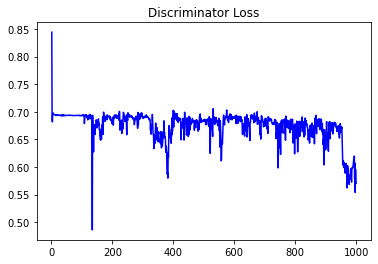

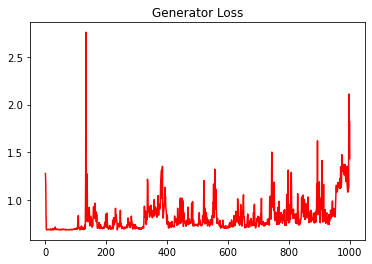

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MAE")
print(mean(ABC_GAN1_metrics[1]))

MAE
0.10164838265047058


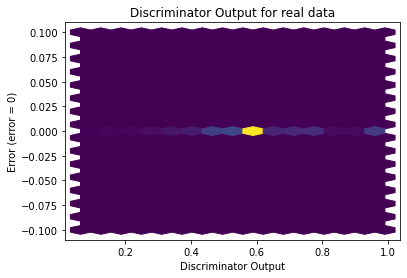

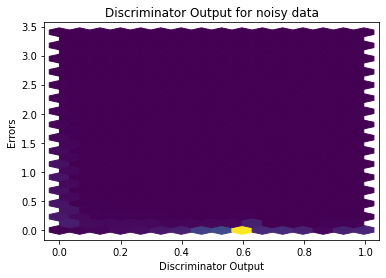

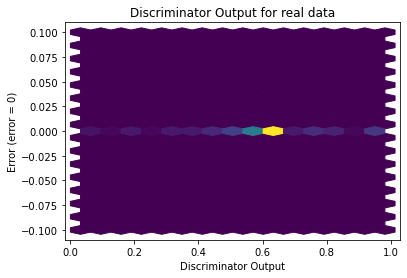

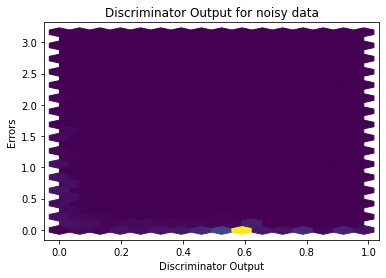

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# mGAN Model with TabNet Generator

In [15]:
gen2 = network.GeneratorTabnet(n_features+1).to(device)
disc2 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen2.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc2.parameters(), lr=0.01, betas=(0.5, 0.999))

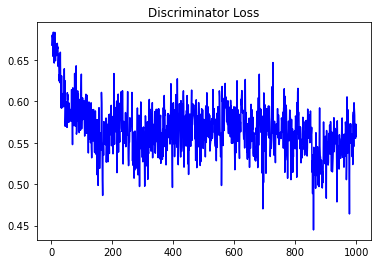

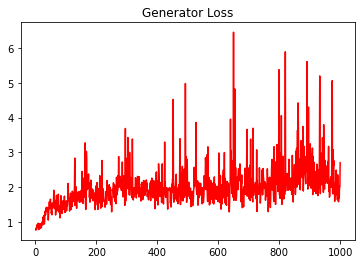

In [16]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc2,gen2,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN2_metrics=ABC_train_test2.test_generator(gen2,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_2 Metrics",ABC_GAN2_metrics)

print("MAE")
print(mean(ABC_GAN2_metrics[1]))

MAE
0.08725323132154617


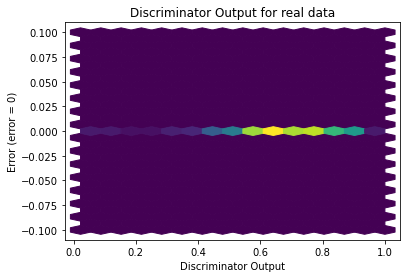

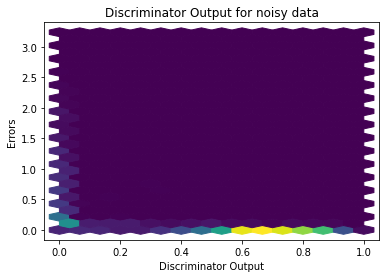

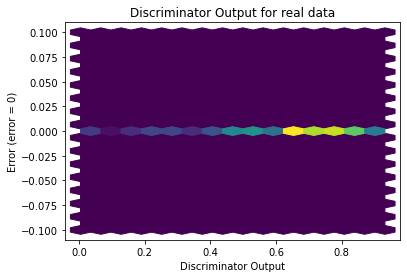

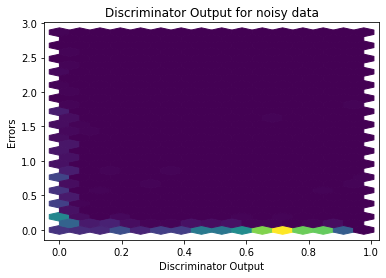

In [18]:
sanityChecks.discProbVsError(train_data,disc2,device)
sanityChecks.discProbVsError(test_data,disc2,device)

# skipGAN Model

In [19]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.01, betas=(0.5, 0.999))


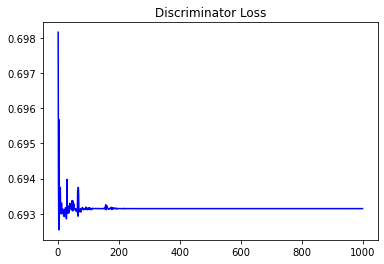

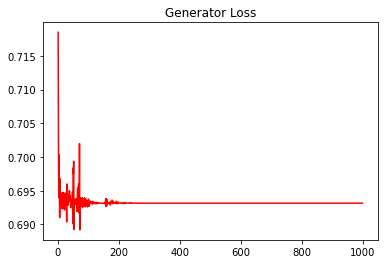

In [20]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [21]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MAE")
print(mean(ABC_GAN3_metrics[1]))

MAE
0.07897303751996392


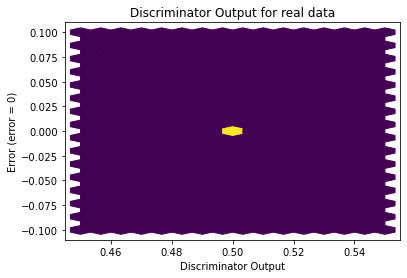

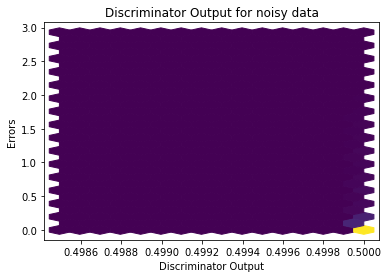

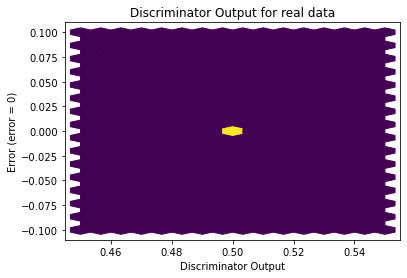

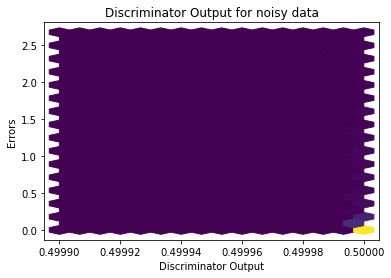

In [22]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

# skipGAN Model with TabNet Generator

In [23]:
#Generator
gen4 = network.GeneratorTabnetskipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc4 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen4.parameters(), lr=0.01, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc4.parameters(), lr=0.01, betas=(0.5, 0.999))


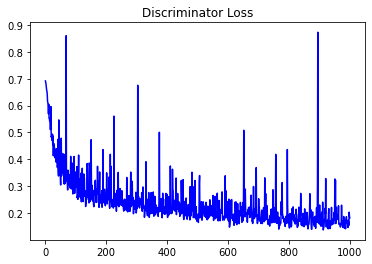

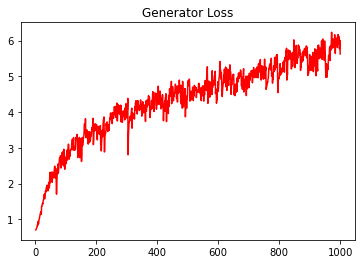

In [24]:
ABC_train_test2.training_GAN_skip_connection(disc4,gen4,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [25]:
ABC_GAN4_metrics=ABC_train_test2.test_generator(gen4,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_4 Metrics",ABC_GAN4_metrics)

print("MAE")
print(mean(ABC_GAN4_metrics[1]))

MAE
0.09411498405426354


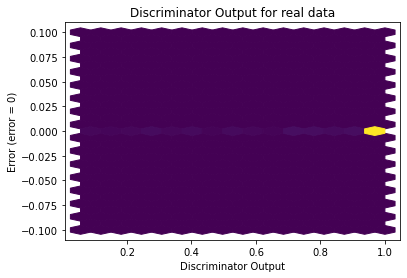

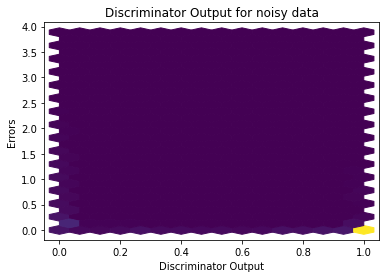

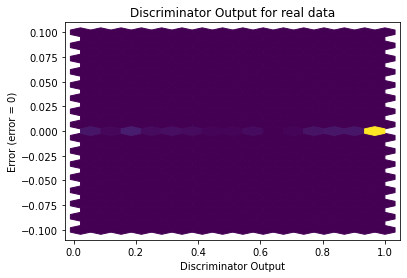

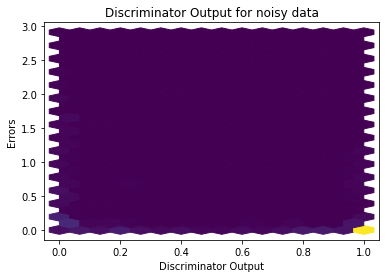

In [26]:
sanityChecks.discProbVsError(train_data,disc4,device)
sanityChecks.discProbVsError(test_data,disc4,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [27]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1056]], requires_grad=True)


## skipGAN Model Analysis (TabNet Generator) 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [28]:
print("Weight of the node at skip connection")
for name,param in gen4.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
